In [1]:
using Random
using Distributions
using HypothesisTests
using StatsPlots

In [2]:
function sim_mwu(; d0=d0, d1=d1, n0=60, n1=30, L=10^5)
    X0 = zeros(n0)
    X1 = zeros(n1)
    pval = zeros(L)
    for i in 1:L
        rand!(d0, X0)
        rand!(d1, X1)
        mwu = ExactMannWhitneyUTest(X0, X1)
        pval[i] = pvalue(mwu)
    end
    pval
end

sim_mwu (generic function with 1 method)

In [3]:
d0 = Gamma(9, 1)
d1 = Normal(8.9, 4.5)

L = 10^7
X0 = rand(d0, L)
X1 = rand(d1, L)
count(X0 .< X1)/L

0.4999969

  1.545143 seconds (1.54 M allocations: 376.954 MiB, 14.42% gc time, 19.77% compilation time)


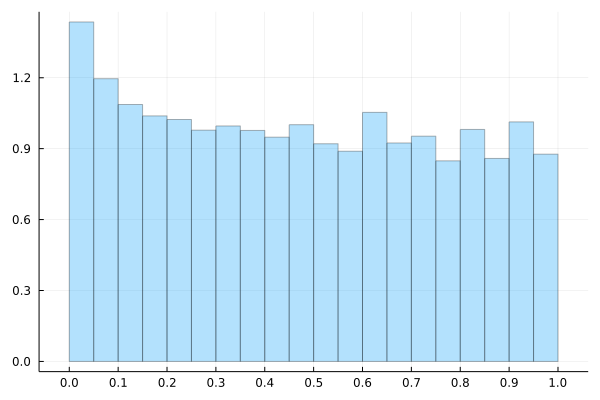

In [4]:
@time pval = sim_mwu(; d0, d1)
histogram(pval; norm=true, bin=0:0.05:1, alpha=0.3, label="")
plot!(; xtick=0:0.1:1)

  0.957499 seconds (600.00 k allocations: 322.724 MiB, 2.55% gc time)


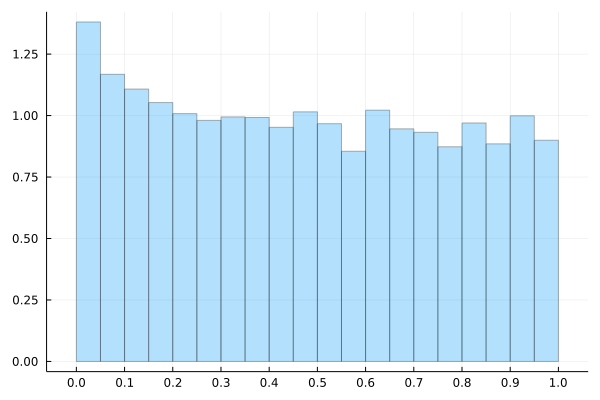

In [5]:
@time pval = sim_mwu(; d0=Normal(), d1=Normal(0, 1.5), n0=60, n1=30)
histogram(pval; norm=true, bin=0:0.05:1, alpha=0.3, label="")
plot!(; xtick=0:0.1:1)

In [6]:
function sim_uvt(; d0=d0, d1=d1, n0=60, n1=30, L=10^5)
    X0 = zeros(n0)
    X1 = zeros(n1)
    pval = zeros(L)
    for i in 1:L
        rand!(d0, X0)
        rand!(d1, X1)
        uvt = UnequalVarianceTTest(X0, X1)
        pval[i] = pvalue(uvt)
    end
    pval
end

sim_uvt (generic function with 1 method)

  0.178177 seconds (732.04 k allocations: 13.445 MiB, 8.85% compilation time)


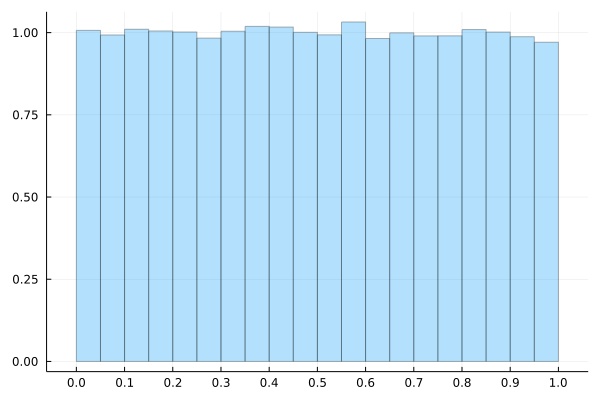

In [7]:
@time pval = sim_uvt(; d0=Normal(), d1=Normal(0, 1.5))
histogram(pval; norm=true, bin=0:0.05:1, alpha=0.3, label="")
plot!(; xtick=0:0.1:1)

  0.248010 seconds (700.00 k allocations: 11.445 MiB)


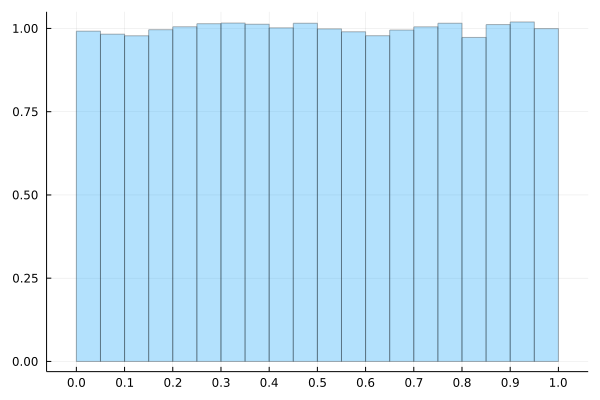

In [10]:
@time pval = sim_uvt(; d0=Gamma(9, 1), d1=Normal(9, 4.5))
histogram(pval; norm=true, bin=0:0.05:1, alpha=0.3, label="")
plot!(; xtick=0:0.1:1)

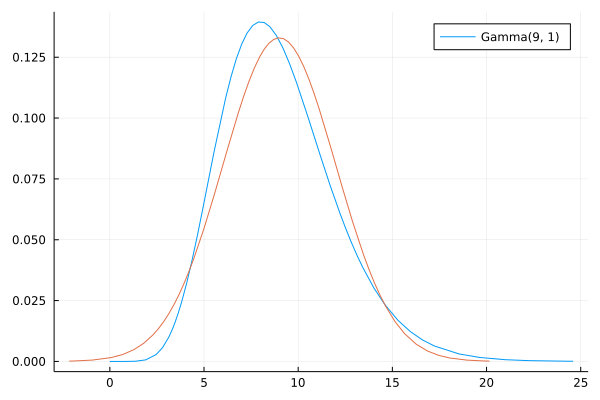

In [9]:
plot(Gamma(9, 1); label="Gamma(9, 1)")
plot!(Normal(9, 3); label="")